In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from prettytable import PrettyTable

In [2]:
customer_df = pd.read_csv('../dataset/customer_classification_clean_data.csv')

In [3]:
customer_df.head()

,age,current_balance,conn_tr,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,has_tv_package_yes,last_contact_cell,last_contact_cellular,last_contact_telephone,last_contact_unknown,outcome_previous_campaign_failure,outcome_previous_campaign_other,outcome_previous_campaign_success,outcome_previous_campaign_unknown,new_contract_this_campaign
0,39,-1.90,4,8,-1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,53,3.62,1,2,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,79,27.87,3,1,377,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,43,5.50,3,2,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,35,3.44,2,16,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [4]:
customer_df.isnull().values.any()

False

In [5]:
customer_df.isnull().sum().sum()

0

In [6]:
customer_df.dtypes

age                                            int64
current_balance                              float64
conn_tr                                        int64
this_campaign                                  int64
days_since_last_contact_previous_campaign      int64
contacted_during_previous_campaign             int64
job_admin.                                     int64
job_blue-collar                                int64
job_entrepreneur                               int64
job_housemaid                                  int64
job_management                                 int64
job_retired                                    int64
job_self-employed                              int64
job_services                                   int64
job_student                                    int64
job_technician                                 int64
job_unemployed                                 int64
job_unknown                                    int64
married_divorced                              

In [8]:

x = customer_df.drop(columns='new_contract_this_campaign')
y = customer_df['new_contract_this_campaign']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [10]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(x_train)
X_test_scale = scaler.fit_transform(x_test)

In [14]:
def auto_train (x,y, model_alg):
    if model_alg == 'lr':
        model = LinearRegression()
    elif model_alg == 'xgb':
        model = XGBRFRegressor()
    elif model_alg == 'rfr':
        model = RandomForestRegressor()
       
    model.fit(X_train_scale, y_train)
    
    return model

In [18]:
def auto_evaluate(model, x, y):
    predictions = model.predict(x)
    
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    mape = mean_absolute_percentage_error(y, predictions)
    
    mse = round(mse, 2)
    mae = round(mae, 2)
    mape = round(mape, 2)
    
    return [mse, mae, mape]

In [19]:
linear = auto_train(X_train_scale, y_train, 'lr')
xgboost = auto_train(X_train_scale, y_train, 'xgb')
random_forest_reg = auto_train(X_train_scale, y_train, 'rfr')

In [20]:
linear_evaluate = auto_evaluate(linear, X_test_scale, y_test)
linear_evaluate

[2.0592325988839787e+21, 32896207607.95, 1.1810046716942724e+26]

In [21]:
xg_evaluate = auto_evaluate(xgboost, X_test_scale, y_test)
xg_evaluate

[0.13, 0.26, 584142266728134.4]

In [22]:
forest_evalaute = auto_evaluate(random_forest_reg, X_test_scale, y_test)
forest_evalaute

[0.1, 0.21, 530372026151080.56]

In [23]:
summary = PrettyTable(['Model', 'MSE', 'MAE', 'MAPE'])

summary.add_row(['LR'] + auto_evaluate(linear, X_test_scale, y_test))
summary.add_row(['XGB'] + auto_evaluate(xgboost, X_test_scale, y_test))
summary.add_row(['RFR'] + auto_evaluate(random_forest_reg, X_test_scale, y_test))

print(summary)

+-------+------------------------+----------------+------------------------+
| Model |          MSE           |      MAE       |          MAPE          |
+-------+------------------------+----------------+------------------------+
|   LR  | 2.0592325988839787e+21 | 32896207607.95 | 1.1810046716942724e+26 |
|  XGB  |          0.13          |      0.26      |   584142266728134.4    |
|  RFR  |          0.1           |      0.21      |   530372026151080.56   |
+-------+------------------------+----------------+------------------------+


In [24]:
predict_1 = np.exp(linear.predict(X_test_scale))

<ipython-input-24-0e8a3c4c2d74>:1: RuntimeWarning: overflow encountered in exp
  predict_1 = np.exp(linear.predict(X_test_scale))


In [25]:
predict = np.exp(random_forest_reg.predict(X_test_scale))

In [26]:
observes = 20

x_ax = range(len(y_test[:observes]))

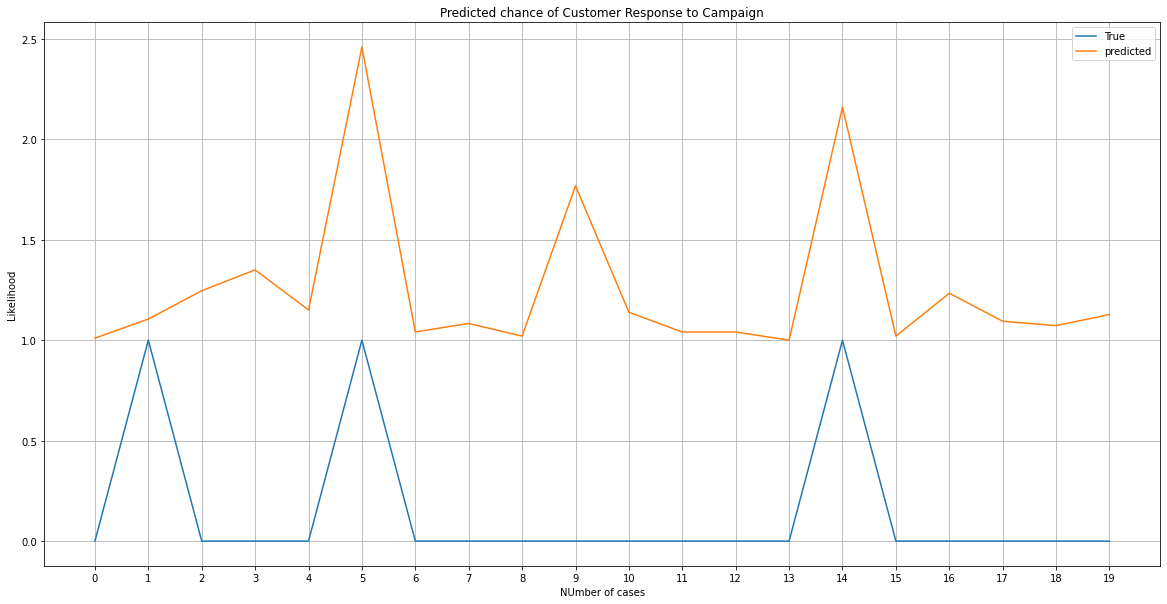

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

plt.plot(x_ax, y_test[:observes], label='True')
plt.plot(x_ax, predict[:observes], label='predicted')
plt.title("Predicted chance of Customer Response to Campaign")
plt.xlabel('NUmber of cases')
plt.ylabel('Likelihood')
plt.xticks(np.arange(observes))
plt.legend()
plt.grid()
plt.show()